In [143]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Bibliotecas DASK
import dask
from dask.distributed import Client
import dask.dataframe as dd # similar ao pandas
import dask.multiprocessing


Primeiro é feita a leitura dos dados utilizando a plataforma de multiprocessamento do dask.

In [144]:
df_dask = dd.read_csv('protests.csv')
df = df_dask.compute() 

In [145]:
df_dask

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles
npartitions=1,,,,,,,,
,string,string,float64,string,string,string,string,int64
,...,...,...,...,...,...,...,...


In [146]:
# df = pd.read_csv('protests.csv')
# df.head()

## 1° análise:
### Análise temporal dos protestos
### 1.1 - Quantidade de protestos por ano

In [147]:


df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df



,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles,year,month,day
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1,2017,1,15
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4,2017,1,16
2,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1,2017,1,16
3,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1,2017,1,16
4,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1,2017,1,18
...,...,...,...,...,...,...,...,...,...,...,...
32518,2020-08-19,"State Capitol, Hartford, CT",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.courant.com/coronavirus/hc-news-co...,3,2020,8,19
32519,2020-08-19,"Summit Middle School, Summit, NJ",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.nj.com/education/2020/08/teachers-...,1,2020,8,19
32520,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.pix11.com/news/local-news/nj-stude...,1,2020,8,19
32521,2020-08-19,"Gloucester, MA",NaN,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.gloucestertimes.com/news/local_new...,1,2020,8,19


### Grafico de protestos ao longo dos anos 


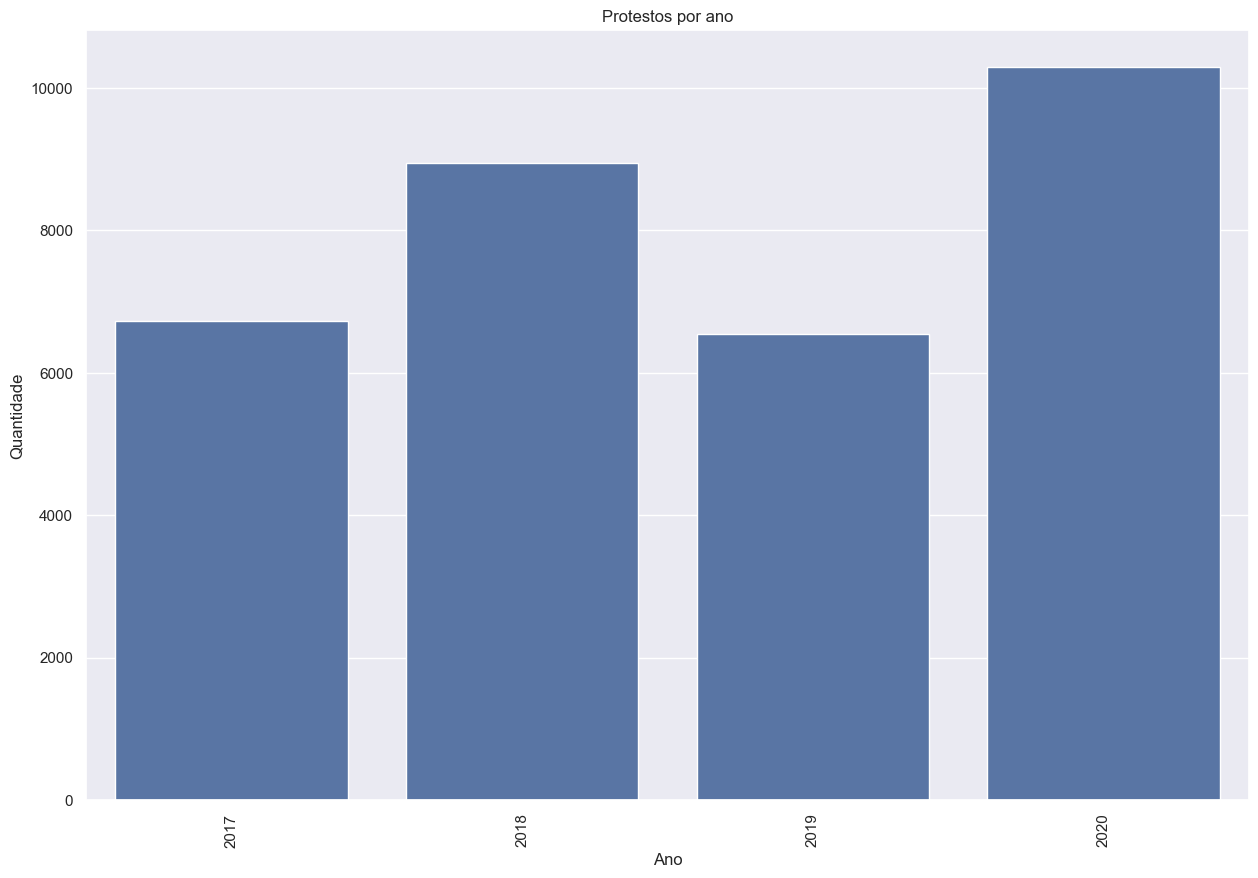

In [148]:
sns.set()

plt.figure(figsize=(15, 10))
sns.countplot(x='year', data=df)
plt.title('Protestos por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

### 1.2 - Quantidade de protestos por mês


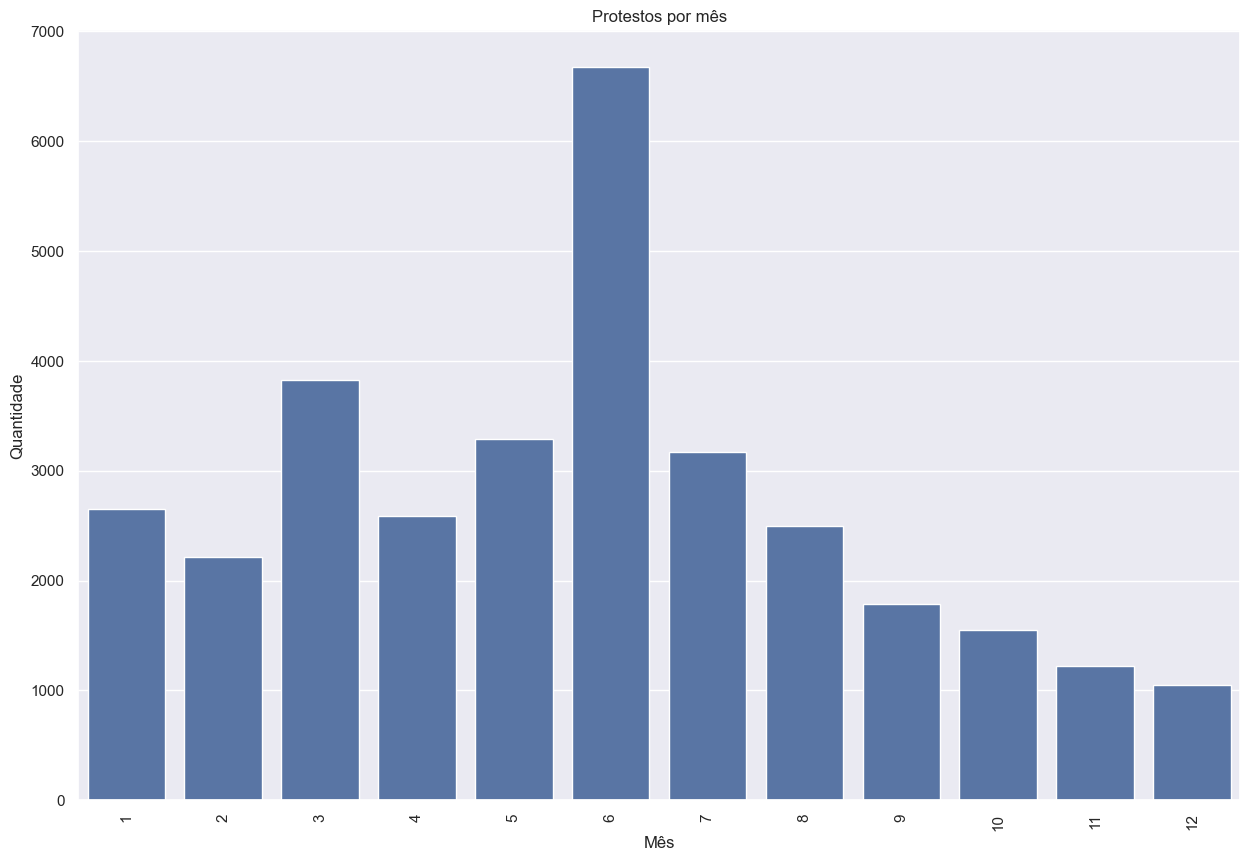

In [149]:
plt.figure(figsize=(15, 10))
sns.countplot(x='month', data=df)
plt.title('Protestos por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()


### 1.3 - Quantidade de protestos por dia


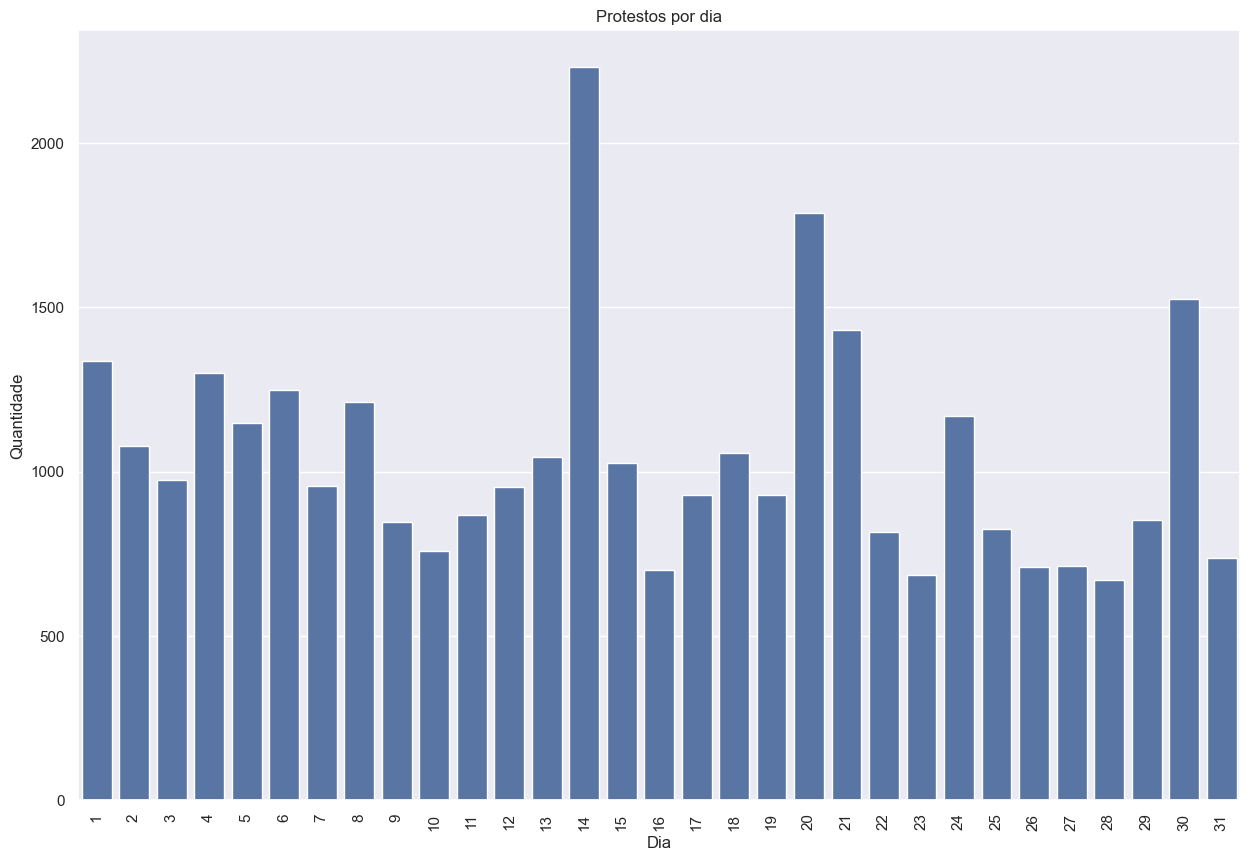

In [150]:
plt.figure(figsize=(15, 10))
sns.countplot(x='day', data=df)
plt.title('Protestos por dia')
plt.xlabel('Dia')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

## Análise de Padrões Temporais nos Protestos:

Ao examinar a distribuição dos protestos ao longo dos meses, 
observamos uma tendência que sugere uma sazonalidade marcante.
Parece haver um aumento consistente no número de protestos durante os meses de verão,
enquanto o final do ano, particularmente dezembro, apresenta uma diminuição notável nas atividades de protesto.

Interpretação dos Padrões Sazonais:

Esta sazonalidade pode ser atribuída a diversos fatores. A hipótese sugere que, durante os meses de verão, 
as condições climáticas mais favoráveis podem encorajar as pessoas a se envolverem em atividades de protesto.
O clima ameno pode criar um ambiente propício para a participação em eventos ao ar livre, influenciando positivamente a mobilização popular.

Por outro lado, a redução de protestos em dezembro pode ser resultado de vários fatores.
Além de ser o mês mais frio do ano em muitas regiões, as preocupações das pessoas durante as festividades de fim de ano 
e o período de férias podem desviar a atenção dos assuntos políticos e sociais.

Após a morte de George Floyd, em maio de 2020, o número de protestos aumentou consideravelmente em relação ao ano anterior, e acarretou também em uma discrepância entre a quantidade de protestos de caráter racial.

# 2° análise:
Análise geográfica dos protestos
2.1 - Quantidade de protestos por região
Antes vamos criar uma coluna com a região de cada estado

list(df['Location'].unique())
vamos criar uma coluna de cidade e estado para facilitar a análise

In [151]:
df['city'] = df['Location'].apply(lambda x: x.split(',')[1] if len(x.split(',')) > 2 else x.split(',')[0])
df['state'] = df['Location'].apply(lambda x: x.split(',')[2] if len(x.split(',')) > 2 else x.split(',')[-1])


In [152]:
# states que possuem só um protesto
# colocar os states que possuem só um protesto em uma lista
states = df['state'].value_counts()
states = states[states == 1]
states = list(states.index)
states
# dropar os estados que possuem só um protesto
df = df[~df['state'].isin(states)]

df['city'].unique()

array([' Bowie', 'Johnson City', 'Indianapolis', ..., 'Henryville',
       'Red Lodge', ' Scotch Plains'], dtype=object)

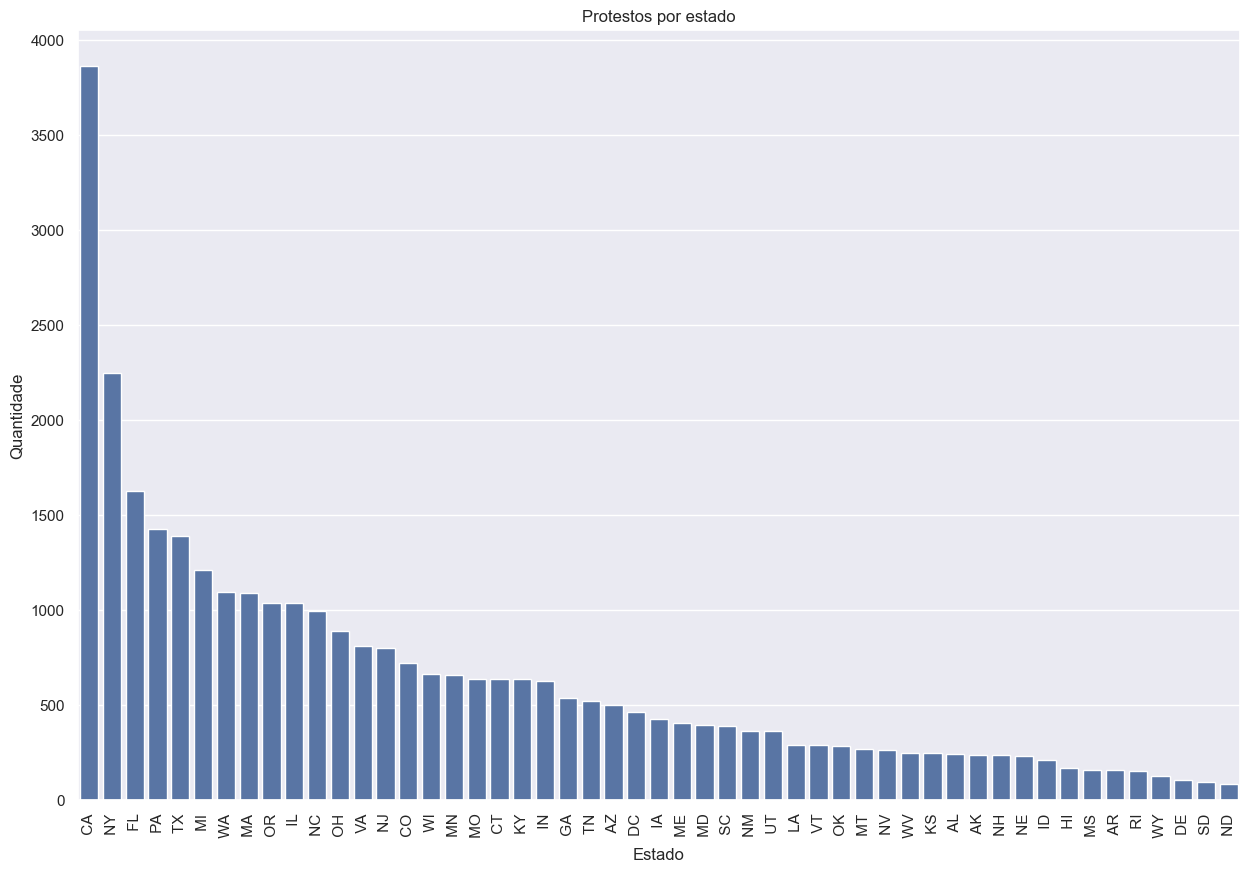

In [153]:
# Agrupar o numero de protestos por estado
df_states = df.groupby('state').count()
df_states = df_states.reset_index()
df_states = df_states[['state', 'Date']]
df_states.columns = ['state', 'count']
# Substituir o nome dos estados
df_states.drop(df_states[df_states['state'] == ' Knoxville'].index, inplace=True)
df_states.drop(df_states[df_states['state'] == ' New York'].index, inplace=True)
df_states.drop(df_states[df_states['state'] == ' GU'].index, inplace=True)
df_states.drop(df_states[df_states['state'] == ' PR'].index, inplace=True)

# dropar os estados Knoxvile e New York
df_states = df_states[~df_states['state'].isin(['Knoxville', 'New York'])]

# grafico de barras com a quantidade de protestos por estado
plt.figure(figsize=(15, 10))
sns.barplot(x='state', y='count', data=df_states.sort_values(by='count', ascending=False))
plt.title('Protestos por estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()


O estado que mais teve protestos foi a California, seguido de Nova York e Texas. Isso pode ser explicado pelo fato de que esses
estados são os mais populosos dos EUA, por isso, é esperado que eles tenham mais protestos.<br />
O estado que menos teve protestos foi o Alaska, seguido de Wyoming e Dakota do Norte. Isso pode ser explicado pelo fato de que esses
estados são os menos populosos dos EUA, por isso, é esperado que eles tenham menos protestos.

In [154]:
us_population = {
    "AL": 4903185,
    "AK": 731545,
    "AZ": 7278717,
    "AR": 3011524,
    "CA": 39538223,
    "CO": 5759428,
    "CT": 3565287,
    "DC": 705749,
    "DE": 984853,
    "FL": 21998813,
    "GA": 10711908,
    "HI": 1455271,
    "ID": 1787065,
    "IL": 12812502,
    "IN": 6785528,
    "IA": 3190369,
    "KS": 2937880,
    "KY": 4505836,
    "LA": 4646702,
    "ME": 1362359,
    "MD": 6177224,
    "MA": 7029917,
    "MI": 10077331,
    "MN": 5704912,
    "MS": 2976149,
    "MO": 6154529,
    "MT": 1068778,
    "NE": 1961504,
    "NV": 3104614,
    "NH": 1359711,
    "NJ": 9288054,
    "NM": 2117522,
    "NY": 20201249,
    "NC": 10488084,
    "ND": 779094,
    "OH": 11709634,
    "OK": 3959353,
    "OR": 4237256,
    "PA": 13002704,
    "RI": 1097379,
    "SC": 5148714,
    "SD": 904594,
    "TN": 6910840,
    "TX": 30034423,
    "UT": 3271616,
    "VT": 643077,
    "VA": 8631179,
    "WA": 7705281,
    "WV": 1792147,
    "WI": 5893718,
    "WY": 578759,
}

In [155]:
# Remove os espaços no nome dos estados em df_states
df_states['state'] = df_states['state'].apply(lambda x: x.strip())
df_states['population'] = df_states['state'].map(us_population)
df_states['protest_per_capita'] = df_states['count'] / df_states['population']




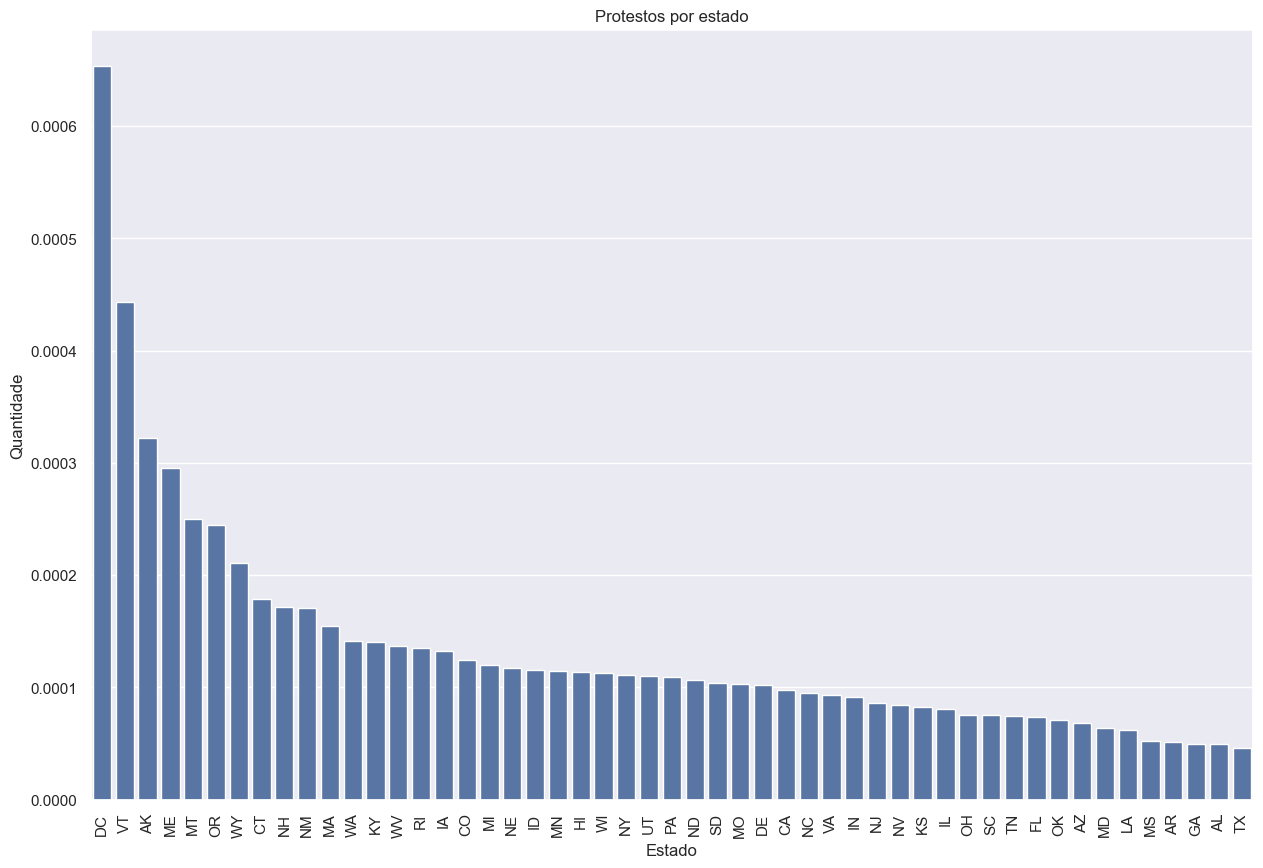

In [156]:
plt.figure(figsize=(15, 10))
sns.barplot(x='state', y='protest_per_capita', data=df_states.sort_values(by='protest_per_capita', ascending=False))
plt.title('Protestos por estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

In [157]:
estados_afiliacoes = {
    'AL': 'republicano', 
    'AK': 'republicano',
    'AZ': 'republicano', 
    'AR': 'republicano',
    'CA': 'democrata', 
    'CO': 'democrata', 
    'CT': 'democrata', 
    'DE': 'democrata',
    'FL': 'republicano',
    'GA': 'republicano', 
    'HI': 'democrata', 
    'ID': 'republicano',
    'IL': 'democrata', 
    'IN': 'republicano', 
    'IA': 'republicano', 
    'KS': 'republicano',
    'KY': 'republicano', 
    'LA': 'republicano', 
    'ME': 'democrata', 
    'MD': 'democrata',
    'MA': 'democrata', 
    'MI': 'democrata', 
    'MN': 'democrata', 
    'MS': 'republicano',
    'MO': 'republicano',
    'MT': 'republicano', 
    'NE': 'republicano', 
    'NV': 'democrata',
    'NH': 'democrata', 
    'NJ': 'democrata', 
    'NM': 'democrata', 
    'NY': 'democrata',
    'NC': 'republicano',
    'ND': 'republicano', 
    'OH': 'republicano', 
    'OK': 'republicano',
    'OR': 'democrata', 
    'PA': 'democrata', 
    'RI': 'democrata', 
    'SC': 'republicano',
    'SD': 'republicano', 
    'TN': 'republicano', 
    'TX': 'republicano', 
    'UT': 'republicano',
    'VT': 'democrata', 
    'VA': 'democrata', 
    'WA': 'democrata', 
    'WV': 'republicano',
    'WI': 'democrata', 
    'WY': 'republicano',
}

df_states['Affiliation'] = df_states['state'].map(estados_afiliacoes)

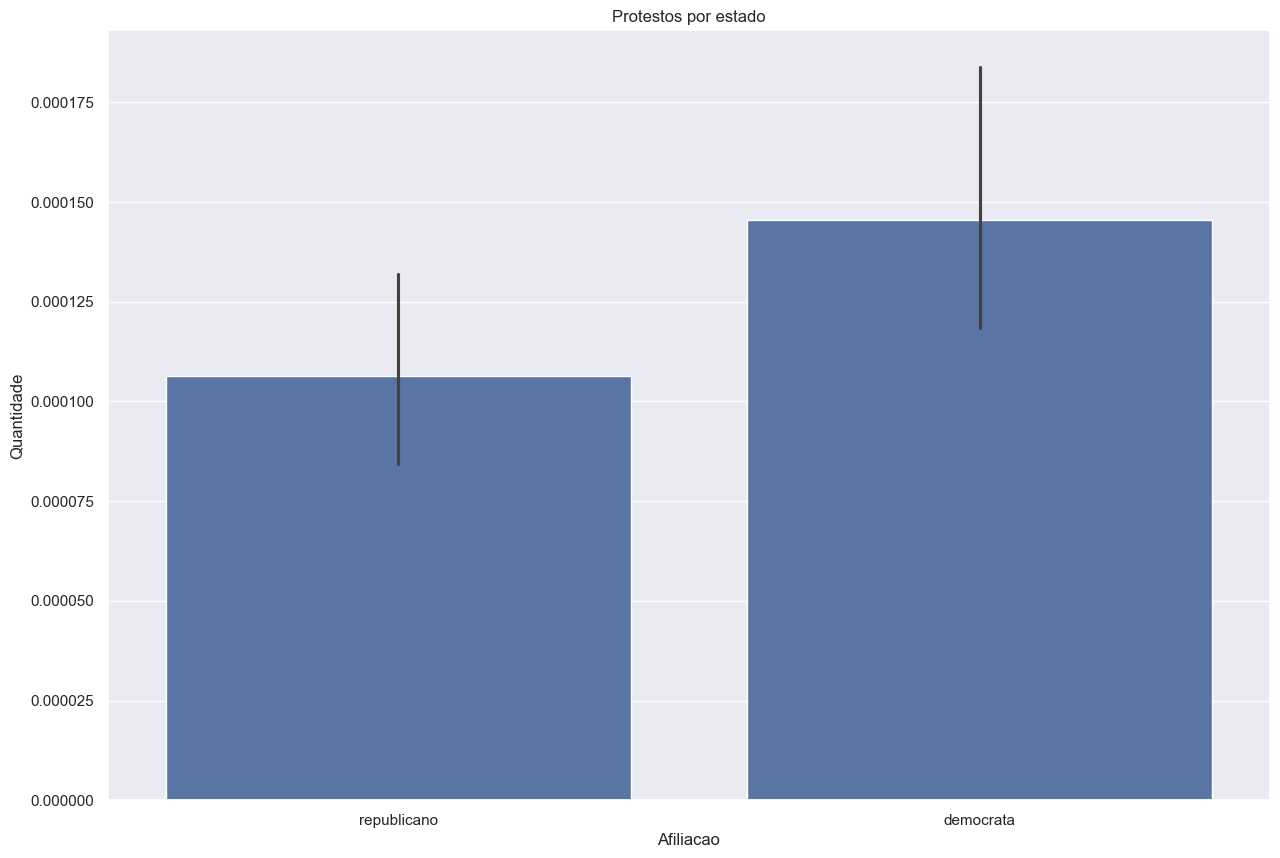

In [158]:
df_democratic_mean = df_states[df_states['Affiliation'] == 'democrata']['protest_per_capita'].mean()
df_republican_mean = df_states[df_states['Affiliation'] == 'republicano']['protest_per_capita'].mean()

plt.figure(figsize=(15, 10))
sns.barplot(x='Affiliation', y='protest_per_capita', data=df_states)
plt.title('Protestos por estado')
plt.xlabel('Afiliacao')
plt.ylabel('Quantidade')
plt.show()


In [159]:
print(f'Media de protestos por estado democrata: {df_democratic_mean}')
print(f'Media de protestos por estado republicano: {df_republican_mean}')
print(f'Diferença percentual: {((df_democratic_mean - df_republican_mean) / df_republican_mean) * 100}%')

Media de protestos por estado democrata: 0.0001455518057984362
Media de protestos por estado republicano: 0.00010634239331479946
Diferença percentual: 36.87091409309107%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


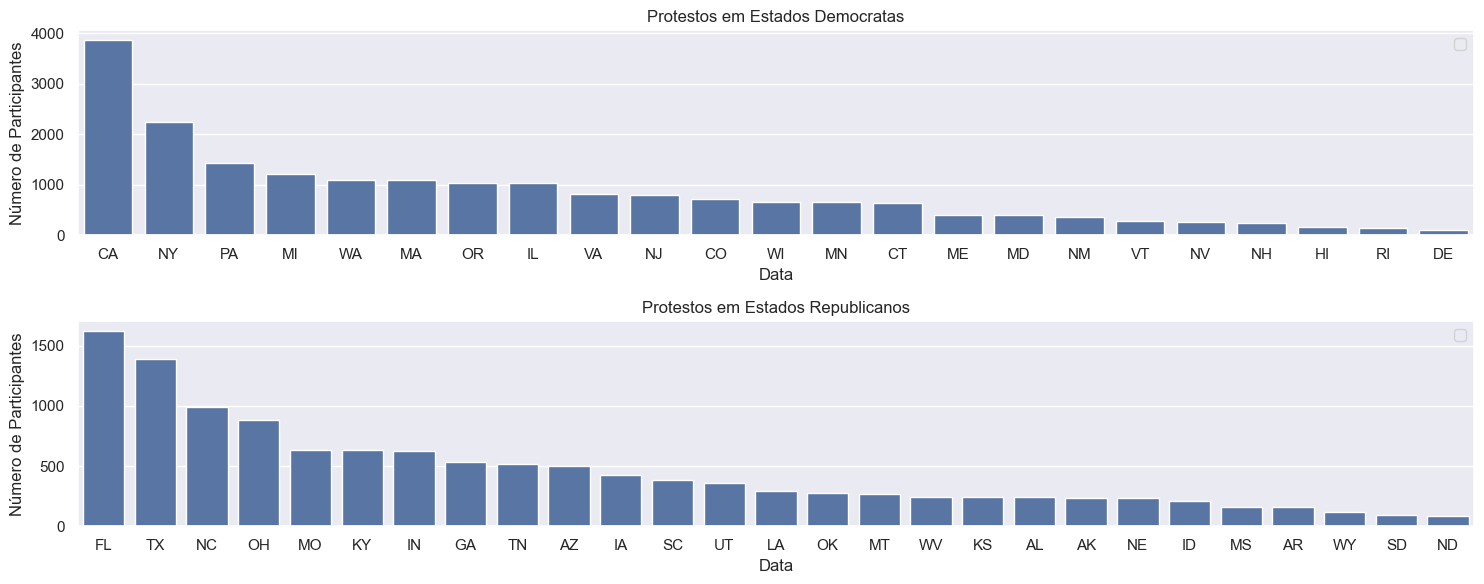

In [160]:

plt.figure(figsize=(15, 6))
# Plot para estados democratas
plt.subplot(2, 1, 1)
df_democratic = df_states[df_states['Affiliation'] == 'democrata']
sns.barplot(x='state', y='count', data=df_democratic.sort_values(by='count', ascending=False))
plt.title('Protestos em Estados Democratas')
plt.xlabel('Data')
plt.ylabel('Número de Participantes')
plt.legend()

# Plot para estados republicanos
plt.subplot(2, 1, 2)
df_republican = df_states[df_states['Affiliation'] == 'republicano']
sns.barplot(x='state', y='count', data=df_republican.sort_values(by='count', ascending=False))
plt.title('Protestos em Estados Republicanos')
plt.xlabel('Data')
plt.ylabel('Número de Participantes')
plt.legend()

plt.tight_layout()
plt.show()

Podemos notar que em estados democratas acontecem consideravelmente mais protestos do que em estados republicanos, mostrando a diferença na luta por direitos entre as pessoas com diferentes visões políticas

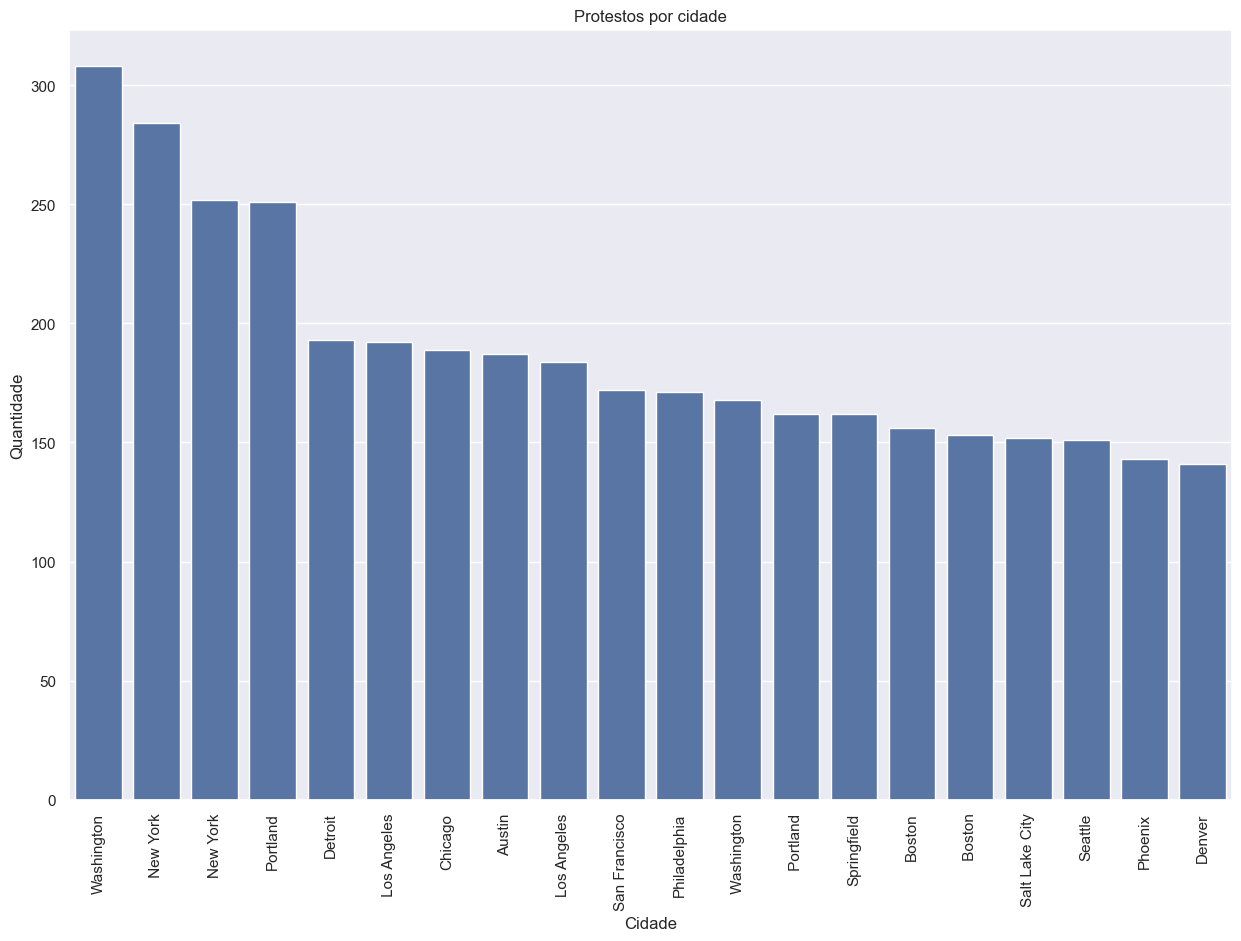

In [161]:
# Analise de protestos por cidade
df_city = df.groupby('city').count()
df_city = df_city.reset_index()
df_city = df_city[['city', 'Date']]
df_city.columns = ['city', 'count']
df_city = df_city.sort_values(by='count', ascending=False)
df_city.head()

# Renomear as cidades
# grafico de barras com a quantidade de protestos por cidade
plt.figure(figsize=(15, 10))
sns.barplot(x='city', y='count', data=df_city.head(20))
plt.title('Protestos por cidade')
plt.xlabel('Cidade')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()


Local onde teve mais protesto foi em Washington, seguido de Philadelphia.<br />
A maioria dos protestos foi em frente aos órgaos governamentais de cada cidade.

## 3° análise:
### Analise de protestos por motivo

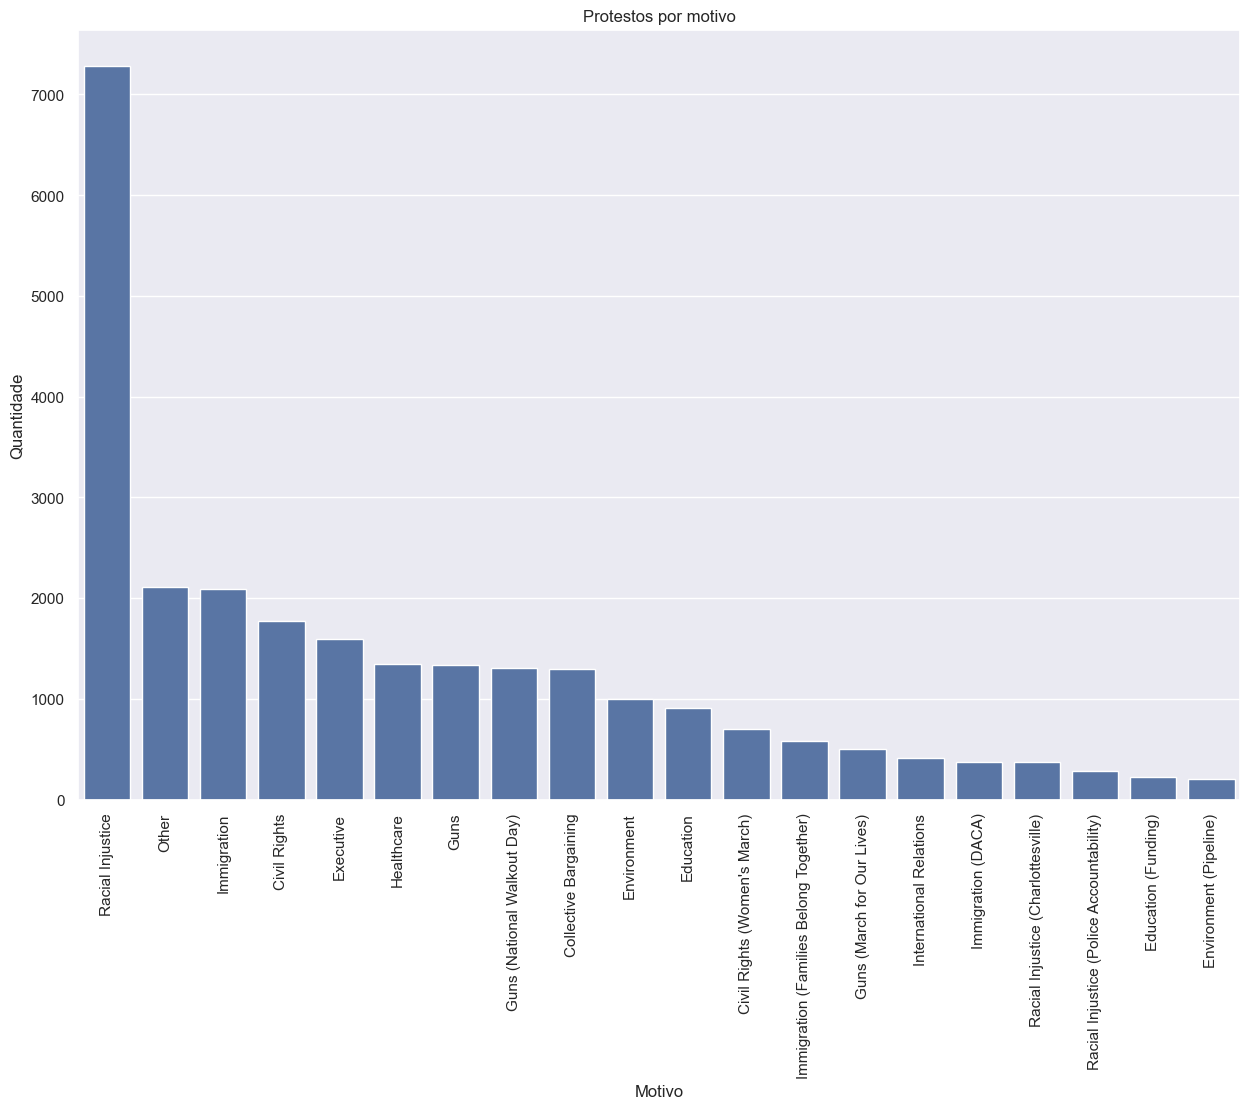

In [162]:
df_cause = df.groupby('Event (legacy; see tags)').count()
df_cause = df_cause.reset_index()
df_cause = df_cause[['Event (legacy; see tags)', 'Date']]
df_cause.columns = ['cause', 'count']
df_cause = df_cause.sort_values(by='count', ascending=False)
df_cause.head()

# grafico de barras com a quantidade de protestos por motivo
plt.figure(figsize=(15, 10))
sns.barplot(x='cause', y='count', data=df_cause.head(20))
plt.title('Protestos por motivo')
plt.xlabel('Motivo')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()




In [163]:
df_cause.head(50)


,cause,count
850,Racial Injustice,7280
413,Other,2112
333,Immigration,2089
0,Civil Rights,1776
243,Executive,1593
300,Healthcare,1341
290,Guns,1340
295,Guns (National Walkout Day),1304
59,Collective Bargaining,1296
172,Environment,994


Tem - se que o motivo que mais teve protesto foi Racial Justice. Isso pode ser explicado pelo fato de que os EUA é um país
onde se existe casos que envolvem racismo e por isso, as pessoas protestam contra isso. Um exemplo disso é o caso de George Floyd
que foi morto por um policial branco e isso gerou uma onda de protestos por todo o país.

In [164]:
# Filtrar dados para a partir de 25-05-2020
df_gf = df[df['Date'] >= '2020-05-25']
df_gf


,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles,year,month,day,city,state
24445,2020-05-25,"Greensboro, NC",NaN,Healthcare,Healthcare; For revising treatment standards; ...,No,https://www.newsobserver.com/news/coronavirus/...,5,2020,5,25,Greensboro,NC
24446,2020-05-25,"Charlotte, NC",10.0,Healthcare,Healthcare; For revising treatment standards; ...,No,https://www.wcnc.com/article/news/health/coron...,6,2020,5,25,Charlotte,NC
24447,2020-05-25,"Raleigh, NC",150.0,Healthcare,Healthcare; For revising treatment standards; ...,No,https://www.newsobserver.com/news/coronavirus/...,5,2020,5,25,Raleigh,NC
24448,2020-05-25,"Wilmington, NC",NaN,Healthcare,Healthcare; For revising treatment standards; ...,No,https://www.newsobserver.com/news/coronavirus/...,4,2020,5,25,Wilmington,NC
24449,2020-05-25,"Asheville, NC",NaN,Healthcare,Healthcare; For revising treatment standards; ...,No,https://www.newsobserver.com/news/coronavirus/...,4,2020,5,25,Asheville,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,2020-08-19,"State Capitol, Hartford, CT",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.courant.com/coronavirus/hc-news-co...,3,2020,8,19,Hartford,CT
32519,2020-08-19,"Summit Middle School, Summit, NJ",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.nj.com/education/2020/08/teachers-...,1,2020,8,19,Summit,NJ
32520,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.pix11.com/news/local-news/nj-stude...,1,2020,8,19,East Orange,NJ
32521,2020-08-19,"Gloucester, MA",NaN,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.gloucestertimes.com/news/local_new...,1,2020,8,19,Gloucester,MA


In [165]:
count_racial_pos_gf = df_gf[df_gf['Event (legacy; see tags)' ] == 'Racial Injustice']["Date"].count()
count_racial_pre_gf = df[df['Date'] < '2020-05-25'][df['Event (legacy; see tags)' ] == 'Racial Injustice']["Date"].count()
print(count_racial_pos_gf)
print(count_racial_pre_gf)

6291
989


C:\Users\andre\AppData\Local\Temp\ipykernel_14728\1702961100.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_racial_pre_gf = df[df['Date'] < '2020-05-25'][df['Event (legacy; see tags)' ] == 'Racial Injustice']["Date"].count()
